# Selection / Shortlisting of ML models
## K fold Cross validation will be used for model selection

In [27]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [10]:
# Import All classifcation Algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.linear_model import LinearRegression, LogisticRegression,Log,Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier,NearestNeighbors, NearestCentroid
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration
from sklearn.neural_network import BernoulliRBM, MLPClassifier, MLPRegressor
from xgboost import XGBClassifier, XGBRegressor

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold
from sklearn import model_selection

In [12]:
# No Chnages were done during feature Engg so we use the encoded file - 1_ITSM_cleansed_Encoded.csv
df1 = pd.read_csv('3_ITSM_cleansed_Encoded_Engineered.csv')


In [13]:
df1.head()

,c_CI_Cat,c_Closure_Code,q_No_of_Reassignments,q_No_of_Related_Incidents,q_No_of_Related_Interactions,t_Close_Time,t_Open_Time,t_ReopenFlag,t_TicketWIPDurationDays,y_Priority
0,11,4,26,2.0,1.0,2013-11-04 13:51:00,2012-02-05 13:32:00,0,638.013194,3
1,1,6,33,1.0,1.0,2013-12-02 12:36:00,2012-03-12 15:44:00,1,629.869444,2
2,1,3,13,0.0,1.0,2013-11-14 09:31:00,2012-07-17 11:49:00,0,484.904167,3
3,1,4,2,0.0,1.0,2013-11-08 13:55:00,2012-08-10 11:01:00,0,455.120833,3
4,1,4,4,0.0,1.0,2013-11-08 13:54:00,2012-08-10 11:27:00,0,455.102083,3


In [14]:
# Setting the lists
CatVarList = ['c_CI_Cat', 'c_Closure_Code','t_ReopenFlag']
ConVarList = ['q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
DatVarList = ['t_Close_Time', 't_Open_Time']
OutValList = ['y_Priority']

X_All_1 = ['c_CI_Cat', 'c_Closure_Code','t_ReopenFlag',
           'q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
           

In [15]:
# Assign varibale and X and y
X1 = df1[X_All_1]
y1 = df1[OutValList]

In [16]:
y1.shape

(35846, 1)

In [17]:
# Split
seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=seed, test_size=.2)

In [22]:
# prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('XGB_gbtree', XGBClassifier(booster='gbtree')))
models.append(('XGB_dart', XGBClassifier(booster='dart')))
models.append(('SVM', SVC()))
models.append(('ANN', MLPClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [24]:
# evaluate each model in turn with X1, y1 based on recall
seed = 10
results = []
names = []
output = []
score = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
for name, model in models:
    cv_results = model_selection.cross_val_score(model,np.array(X1_train),np.array(y1_train),cv=kfold,scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    output.append(msg)
    print(output)

# Best Accuracy Result is comes from  XGB, GBC and Desision tree, in that order
print(output)

E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana

['RF: 0.622227 (0.009116)']


E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

['RF: 0.622227 (0.009116)', 'KNN: 0.649707 (0.010001)']
['RF: 0.622227 (0.009116)', 'KNN: 0.649707 (0.010001)', 'CART: 0.602525 (0.008371)']


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

['RF: 0.622227 (0.009116)', 'KNN: 0.649707 (0.010001)', 'CART: 0.602525 (0.008371)', 'XGB_gbtree: 0.688799 (0.010184)']


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

['RF: 0.622227 (0.009116)', 'KNN: 0.649707 (0.010001)', 'CART: 0.602525 (0.008371)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)']


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma

['RF: 0.622227 (0.009116)', 'KNN: 0.649707 (0.010001)', 'CART: 0.602525 (0.008371)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)', 'SVM: 0.677151 (0.007896)']


E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

['RF: 0.622227 (0.009116)', 'KNN: 0.649707 (0.010001)', 'CART: 0.602525 (0.008371)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)', 'SVM: 0.677151 (0.007896)', 'ANN: 0.679139 (0.007689)']


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

['RF: 0.622227 (0.009116)', 'KNN: 0.649707 (0.010001)', 'CART: 0.602525 (0.008371)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)', 'SVM: 0.677151 (0.007896)', 'ANN: 0.679139 (0.007689)', 'GBC: 0.690891 (0.010497)']
['RF: 0.622227 (0.009116)', 'KNN: 0.649707 (0.010001)', 'CART: 0.602525 (0.008371)', 'XGB_gbtree: 0.688799 (0.010184)', 'XGB_dart: 0.688833 (0.010223)', 'SVM: 0.677151 (0.007896)', 'ANN: 0.679139 (0.007689)', 'GBC: 0.690891 (0.010497)']


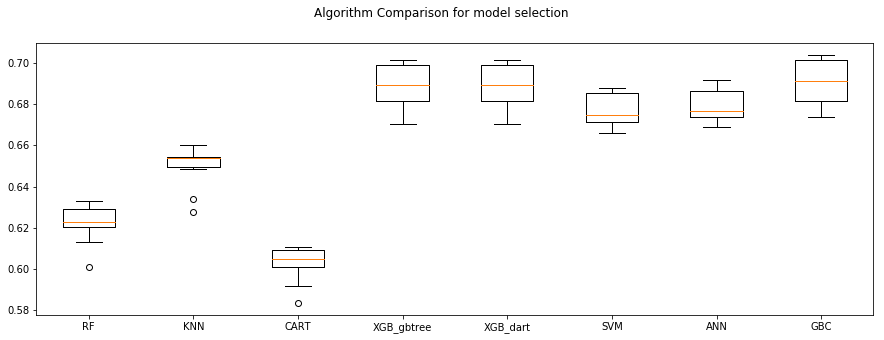

In [25]:
# boxplot KFold using 10 splits - algorithm comparison
rcParams['figure.figsize'] =15,5

# Put figure title
fig = plt.figure()
fig.suptitle('Algorithm Comparison for model selection')
ax = fig.add_subplot(111)
# draw plot
plt.boxplot(results)
# label in X axis
#ax = fig.add_subplot(111)
ax.set_xticklabels(names)
# Show the plot
plt.show()

# Key Observations
## 1. XG Boost is selected for futher optimizations

In [26]:
Counter(df1.y_Priority)

Counter({3: 22023, 2: 5068, 4: 8321, 1: 431, 0: 3})